In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json
import os
import pickle
import sys

from konlpy.tag import Kkma, Okt
import gc

import re
from sklearn.feature_extraction.text import CountVectorizer

from collections import defaultdict

In [3]:
from ksenticnet_kaist import *

ksenticnet = get_ksenticnet()

keys = list(ksenticnet.keys())
senticvals = [[float(i) for i in val[:4]] for val in  ksenticnet.values()]
sentiments = []
polarity = []
semantics = []
for key, val in ksenticnet.items():
    for i in val[4:]:
        if i in ['positive', 'negative']:
            polar_ind = val.index(i)
            sentiments.append(val[4 : polar_ind])
            polarity.append(val[polar_ind : polar_ind+2])
            semantics.append(val[polar_ind+2 :])
            break

ksenticnets = defaultdict(dict)
for key, val, senti, p, seman in zip(keys, 
                                     senticvals, 
                                     sentiments, 
                                     polarity, 
                                     semantics):
    ksenticnets[key]['sentic_value'] = val
    ksenticnets[key]['sentiment'] = senti
    ksenticnets[key]['polarity'] = p
    ksenticnets[key]['semantic'] = seman

f = lambda x : [i if i > 0 else 0 for i in x]
g = lambda x : [abs(i) if i < 0 else 0 for i in x]
scores = np.array(list(map(lambda x : f(x) + g(x), senticvals)))
scores /= scores.sum(axis=1).reshape(-1, 1)

class KSenticNet():
    keys = {j : i for i, j in  enumerate(keys)}
    scores = scores

{'State': '1.0000', 'United States': '0.8182', 'Law': '0.5152', 'may': '0.5000', 'Congress': '0.4394', 'President': '0.3939', 'Section': '0.3333', 'Person': '0.3333', 'Office': '0.3333', 'Year': '0.3182', 'time': '0.3030', 'House': '0.2879', 'one': '0.2879', 'Case': '0.2879', 'Senate': '0.2576', 'Power': '0.2424', 'Constitution': '0.2121', 'Vote': '0.2121', 'Legislature': '0.1970', 'thereof': '0.1818', 'Senator': '0.1818', 'Officer': '0.1818', 'every': '0.1667', 'Citizen': '0.1667', 'Member': '0.1667', 'Representative': '0.1515', 'make': '0.1515', 'Bill': '0.1515', 'Article': '0.1364', 'Number': '0.1364', 'made': '0.1364', 'first': '0.1364', 'House Representatives': '0.1364', 'two thirds': '0.1364', 'several State': '0.1364', 'provide': '0.1212', 'within': '0.1212', 'three': '0.1212', 'Manner': '0.1212', 'two': '0.1212', 'except': '0.1212', 'Day': '0.1212', 'Elector': '0.1212', 'Vice President': '0.1212', 'executive': '0.1061', 'Authority': '0.1061', 'unless': '0.1061', 'Place': '0.106

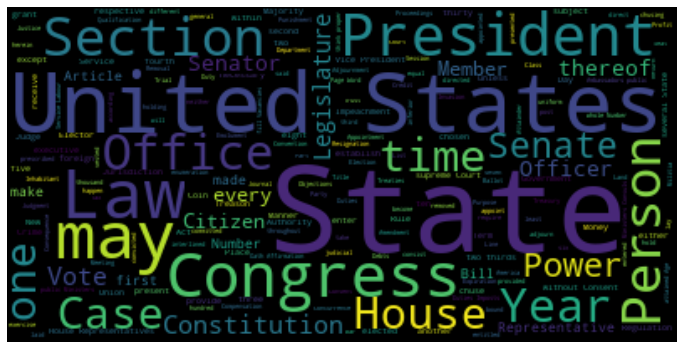

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

# 텍스트 파일 불러오기
file_path_ch02 = 'C:\workspace\KSA\data\modeule04\ch02'.replace('\\', '/') + '/'
f = open(file_path_ch02 + 'constitution.txt')
text = f.read()
f.close()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud().generate(text)
print(
    {i:'{:.4f}'.format(j) for i, j in wordcloud.words_.items()}
)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

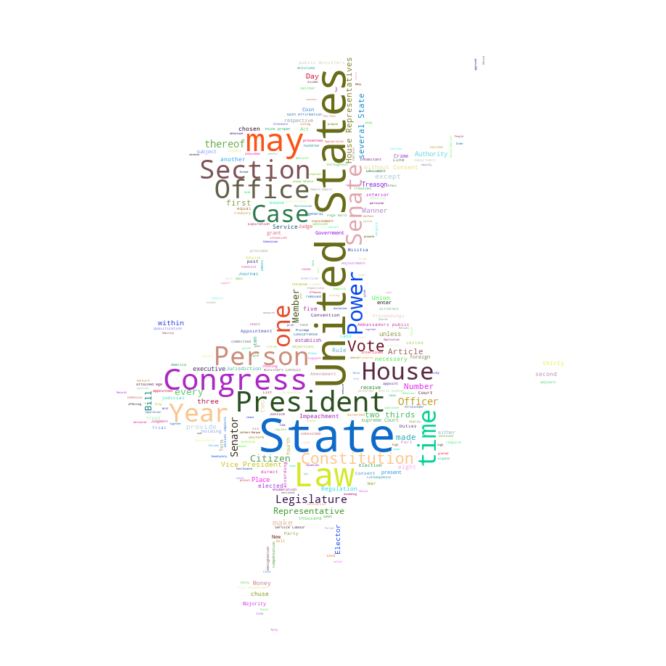

In [5]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# 이미지 불러오기
filename = file_path_ch02 + 'alice_mask.png'
f = Image.open(filename)
alice_mask = np.array(f)

# 삭제할 단어와 추가
stopwords = set(STOPWORDS)
stopwords.add('said')

# 텍스트 파일 불러오기
f = open(file_path_ch02 + 'constitution.txt')
text = f.read()
f.close()

# 단어별 빈도 계산(공백으로 분리되 단어)
wordcloud = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask,
                     stopwords=stopwords)
wordcloud = wordcloud.generate(text)

# 색상 함수
def wc_color(word, font_size,  position, orientation,
            random_state=None, **kwargs):
    return tuple(np.random.randint(0, 255, (3)))

# 워드클라우드 작성
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=wc_color, random_state=2),
          interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
wordcloud.recolor()

In [8]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(background_color = 'white', 
                      max_words=300, 
                      width=800, 
                      height=800, 
                      font_path=font_path,
                     )
wordcloud.generate_from_frequencies(keywords)
# array = wordcloud.to_array()
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=simple_color_func)

# from wordcloud import get_single_color_func

# class GroupedColorFunc(object):
#     def __init__(self, color_to_words, default_color):
#         self.color_func_to_words = [
#             (get_single_color_func(color), set(words))
#             for (color, words) in color_to_words.items()]

#         self.default_color_func = get_single_color_func(default_color)

#     def get_color_func(self, word):
#         """Returns a single_color_func associated with the word"""
#         try:
#             color_func = next(
#                 color_func for (color_func, words) in self.color_func_to_words
#                 if word in words)
#         except StopIteration:
#             color_func = self.default_color_func

#         return color_func

#     def __call__(self, word, **kwargs):
#         return self.get_color_func(word)(word, **kwargs)

# grouped_color_func = GroupedColorFunc(color_to_words, default_color)
# wordcloud.recolor(color_func=grouped_color_func)

NameError: name 'keywords' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

In [33]:
ksenticnets.keys()

dict_keys(['가게', '가격', '가계', '가곡', '가공', '가교', '가구', '가금', '가난', '가난뱅이', '가난하', '가내', '가담', '가담하', '가도', '가동', '가동하', '가랑비', '가랑이', '가래침', '가로', '가로등', '가로막', '가르치', '가리키', '가마', '가망', '가망없', '가모', '가뭄', '가부', '가부장제', '가빠', '가사', '가상', '가상하', '가설하', '가성', '가세', '가세하', '가속도', '가수', '가슴', '가슴앓이', '가실', '가업', '가옥', '가운데', '가위', '가을', '가이드', '가인', '가장자리', '가장하', '가재', '가재도구', '가정과', '가정의', '가정하', '가제', '가족', '가죽', '가지', '가축', '가치', '가택', '가필', '각본', '각부', '각성', '각성제', '각오', '각오하', '각축', '각하', '각형', '간', '간계', '간과', '간발', '간부', '간사', '간선도로', '간섭', '간섭하', '간세포', '간수', '간음', '간장', '간주하', '간지', '간첩', '간행', '간행물', '간호', '갈', '갈등', '갈림길', '갈매기', '갈보', '갈색', '갈증', '감', '감각', '감각하', '감귤', '감금', '감금하', '감기', '감독', '감리', '감미료', '감별', '감사', '감사하', '감상', '감색', '감수', '감식', '감응', '감자', '감정하', '감지', '감찰', '감청', '감축', '감칠맛', '값', '값어치', '갓난아기', '갓난아이', '갓난애', '강구', '강구하', '강국', '강대국', '강도', '강론', '강모', '강박하', '강습', '강습하', '강심제', '강아지', '강의실', '강장제', '강조', '강조하', '강풍', '강화', '개', '개가', '개가하', '개구리', '개그맨',

In [9]:
i2senti = {0 : 'joy', 1 : 'interest', 2 : 'anger', 3 : 'admiration',
           4 : 'sadness', 5 : 'surprise', 6 : 'fear', 7 : 'disgust'}

In [10]:
sentidict = defaultdict(list)

for key in ksenticnets.keys():
    a, b, c, d = ksenticnets[key]['sentic_value']
    is_negative = []
    for v in [a, b, c, d]:
        if v >= 0:
            is_negative.append(False)
        else:
            is_negative.append(True)
    abs_val = list(map(lambda x : abs(x), [a, b, c, d]))
    i = np.argmax(abs_val)
    if is_negative[i]:
        i += 4
    sentidict[i2senti[i]].append(key)

In [11]:
for i, j in sentidict.items():
    print('{:4}\t{:>10s}'.format(len(j), i))

1308	admiration
1088	  interest
 342	  surprise
 513	   sadness
 669	   disgust
 248	      fear
 450	     anger
 847	       joy


In [12]:
[key] + ksenticnets[key]['semantic']

['힘', '응원', '방조', '조력', '가세', '가담', '뒷받침', '보좌', '일조', '어시스트', '돕', '도움', '보필']

In [13]:
from collections import Counter
corpus = []
for key in ksenticnets.keys():
    corpus.extend([key] + ksenticnets[key]['semantic'])
ccorpus = Counter(corpus)

In [14]:
t = ccorpus.most_common(2000)
for i in t:
    print(i, ksenticnets[i[0]]['sentiment'][0])

('기운', 33) #joy
('세상', 32) #joy
('때', 28) #admiration
('마음', 26) #admiration
('형', 26) #joy
('여자', 26) #joy
('선', 24) #joy
('위', 24) #surprise
('부인', 23) #anger
('시간', 22) #joy
('재', 22) #interest
('시기', 22) #joy
('시절', 22) #joy
('해', 22) #interest
('수', 22) #anger
('양력', 22) #joy
('여사', 21) #sadness
('친족', 20) #interest
('배', 20) #admiration
('끝', 20) #interest
('대', 20) #surprise
('인생', 20) #interest
('생명', 20) #joy
('수명', 20) #joy
('시점', 19) #joy
('결말', 19) #interest
('계집', 19) #fear
('기', 18) #sadness
('시대', 18) #interest
('운수', 18) #interest
('내용연수', 18) #interest
('일평생', 18) #interest
('생', 18) #interest
('전세', 18) #interest
('한평생', 18) #interest
('필생', 18) #interest
('현세', 18) #interest
('주년', 18) #interest
('평생', 18) #interest
('당대', 18) #interest
('일기', 18) #interest
('일생', 18) #interest
('종신', 18) #interest
('백년', 18) #interest
('생애', 18) #interest
('목숨', 18) #interest
('생전', 18) #interest
('일가', 17) #anger
('정신', 17) #anger
('책략', 17) #joy
('계략', 17) #joy
('술수', 17) #joy
('모

('계제', 5) #joy
('설계', 5) #interest
('고개', 5) #joy
('고기잡이', 5) #joy
('고령', 5) #sadness
('노년기', 5) #sadness
('고명', 5) #surprise
('명예', 5) #interest
('고민', 5) #sadness
('번민', 5) #sadness
('골목', 5) #joy
('소로', 5) #joy
('오솔길', 5) #joy
('골목길', 5) #joy
('씨족', 5) #interest
('협동', 5) #joy
('공로', 5) #interest
('사적', 5) #interest
('공적', 5) #interest
('위업', 5) #interest
('업적', 5) #interest
('공의', 5) #joy
('욕심', 5) #anger
('과장', 5) #interest
('관리인', 5) #interest
('지배인', 5) #interest
('관리자', 5) #interest
('지휘자', 5) #interest
('관례', 5) #joy
('상례', 5) #joy
('인습', 5) #joy
('풍습', 5) #joy
('관리하', 5) #interest
('관장하', 5) #interest
('국량', 5) #joy
('광선', 5) #sadness
('광장', 5) #interest
('체위', 5) #interest
('포지션', 5) #interest
('군데', 5) #interest
('지점', 5) #interest
('산들바람', 5) #joy
('상종', 5) #fear
('성교', 5) #anger
('교역', 5) #interest
('교체하', 5) #interest
('교환하', 5) #interest
('이동', 5) #joy
('구비', 5) #joy
('신화', 5) #joy
('전설', 5) #joy
('우화', 5) #joy
('설화', 5) #joy
('대상', 5) #sadness
('정계', 5) #sadness
('한계',

In [15]:
sentidict2 = defaultdict(list)
for senti in sentidict.keys():
    for word in sentidict[senti]:
        sentidict2[senti].append((word, ccorpus[word]))
    sentidict2[senti] = sorted(sentidict2[senti], key=lambda x : x[1], reverse=True)

In [16]:
corpus = [j for i in sentidict2.values() for j in i]
keywords = dict(corpus)

In [17]:
list('사랑한나를모질게'
     '모질게도나')

['사', '랑', '한', '나', '를', '모', '질', '게', '모', '질', '게', '도', '나']

In [18]:
senti2col = {
    'interest' : '#FFC58D',
    'joy' : '#FFFF55',
    'anger' : '#FC0202',
    'admiration' : '#01B300',
    'sadness' : '#5151FF',
    'surprise' : '#57BDFC',
    'fear' : '#009802',
    'disgust' : '#FF55FD',
}

In [19]:
color_to_words = {}
for k, v in sentidict.items():
    color_to_words[senti2col[k]] = v

# WordCloud

In [20]:
default_color = '#7777'

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# 이미지 불러오기
filename = 'schizophrenia.png'
f = Image.open(filename)
alice_mask = np.array(f)

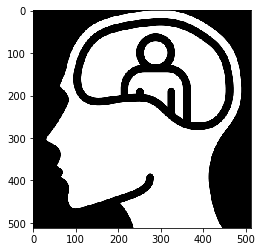

In [23]:
shape = (512, 512, 1)

alice_mask = np.concatenate((
    alice_mask[:, :, 1].reshape(shape),
    alice_mask[:, :, 1].reshape(shape),
    alice_mask[:, :, 1].reshape(shape)),
    axis=2)

plt.imshow(alice_mask)

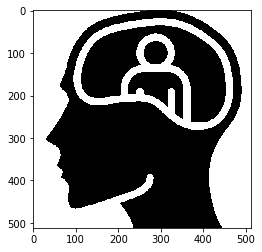

In [24]:
plt.imshow(np.where(alice_mask == 0, 255, 0))

In [25]:
from PIL import Image
from wordcloud import WordCloud

# 이미지 불러오기
filename = 'schizophrenia.png'
f = Image.open(filename)
alice_mask = np.array(f)
shape = (512, 512, 1)
alice_mask = np.concatenate((
    alice_mask[:, :, 1].reshape(shape),
    alice_mask[:, :, 1].reshape(shape),
    alice_mask[:, :, 1].reshape(shape)),
    axis=2)
alice_mask = np.where(alice_mask==0, 255, 0)

font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(background_color = 'white', 
                      max_words=300, 
                      width=800, 
                      height=800, 
                      font_path=font_path,
                      mask=alice_mask
                     )
wordcloud.generate_from_frequencies(keywords)
# array = wordcloud.to_array()
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=simple_color_func)

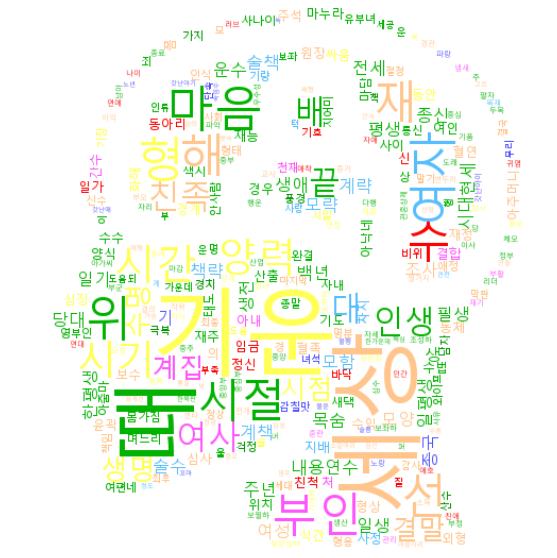

In [27]:
fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear", )
plt.axis("off")
plt.show()
# fig.savefig('wordcloud_without_axisoff.png')